# Breast Cancer Recurrence Prediction using Machine Learning

## Dataset

Variables in this dataset are:

***Class***: whether or not there has been a recurrence of cancer<br>
***Age***: patient's age at the time of diagnosis<br>
***Menopause***: menopausal status of the patient at the time of diagnosis, pre-menopausal (*premeno*) or post-menopausal (*ge40*, *lt40*) at the time of diagnosis:<br>
***Tumour Size***: the size of the tumour (mm) at the time of diagnosis<br>
***Invasive Nodes***: the total number of lymph nodes confirming Breast Cancer at the time of the histological examination<br>
***Node Caps***: whether the tumour penetrated in the lymph node capsule<br>
***Degree of Malignancy***: divided into 1 -2 or 3, depending on the malignancy of the tumour<br>
***Breast***: the position of the tumour (left or right breast)<br>
***Breast Quadrant***: the quadrant of the breast where the tumour is present<br>
***Irradiation***: whether radiation therapy has been used as a treatment to destroy cancer cells<br>

The data is provided as two separate ```.data``` files<br>
- ```breast-cancer.data```, containing the dataset 
- ```breast-cancer.names```, containing relevant informations about the dataset

In [404]:
# import the files
data = open("./dataset/breast-cancer.data")
feat = open("./dataset/breast-cancer.names")

data = data.read()
feat = feat.read()

In [405]:
# preview the first two rows of the dataset
print(data.split('\n',1)[0])
print(data.split('\n',2)[1])

no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no


In [406]:
# view information about the dataset
print(feat)

Citation Request:
   This breast cancer domain was obtained from the University Medical Centre,
   Institute of Oncology, Ljubljana, Yugoslavia.  Thanks go to M. Zwitter and 
   M. Soklic for providing the data.  Please include this citation if you plan
   to use this database.

1. Title: Breast cancer data (Michalski has used this)

2. Sources: 
   -- Matjaz Zwitter & Milan Soklic (physicians)
      Institute of Oncology 
      University Medical Center
      Ljubljana, Yugoslavia
   -- Donors: Ming Tan and Jeff Schlimmer (Jeffrey.Schlimmer@a.gp.cs.cmu.edu)
   -- Date: 11 July 1988

3. Past Usage: (Several: here are some)
     -- Michalski,R.S., Mozetic,I., Hong,J., & Lavrac,N. (1986). The 
        Multi-Purpose Incremental Learning System AQ15 and its Testing 
        Application to Three Medical Domains.  In Proceedings of the 
        Fifth National Conference on Artificial Intelligence, 1041-1045,
        Philadelphia, PA: Morgan Kaufmann.
        -- accuracy range: 66%-72%
     -

In the informative, file we have important information about the dataset at *7. Attribute Information*. It is specified that the dataset includes missing values denoted with the attribute **'?'**

In [407]:
# replace missing dataset attributes to NAN
data = data.replace('?','')

## Exploratory Data Analysis

### Transforming to DataFrame

The data is stored as ```str```. It is necessary to convert it to ```DataFrame``` format

In [408]:
# import libraries
import pandas as pd
pd.set_option('display.max_colwidth', None) #setting max colwidth to view the entire dataset when using the print() command
from io import StringIO
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [409]:
# convert data from str to dataframe
data = StringIO(data)
data = pd.read_csv(data, sep=",")
print(type(data)) #check the data variable is a pandas.core.frame.DataFrame

<class 'pandas.core.frame.DataFrame'>


Now that the data is correctly converted into a DataFrame table, I will rename the columns according to the attributes in the ```.names``` file

In [410]:
data.columns = ['class', 'age', 'menopause', 'tumour_size', 'inv_nodes', 'node_caps', 'deg_malig', 'breast', 'breast_quad', 'irrad']
data.columns

Index(['class', 'age', 'menopause', 'tumour_size', 'inv_nodes', 'node_caps',
       'deg_malig', 'breast', 'breast_quad', 'irrad'],
      dtype='object')

In [411]:
# preview the DataFrame table created
data.head()

,class,age,menopause,tumour_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irrad
0,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
2,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
3,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
4,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no


### Explore the Dataset

In [412]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class        285 non-null    object
 1   age          285 non-null    object
 2   menopause    285 non-null    object
 3   tumour_size  285 non-null    object
 4   inv_nodes    285 non-null    object
 5   node_caps    277 non-null    object
 6   deg_malig    285 non-null    int64 
 7   breast       285 non-null    object
 8   breast_quad  284 non-null    object
 9   irrad        285 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.4+ KB


### Explore the target Attributes

I want to have a more thorough look at the data inside each attribute, starting from ```'class'``` which contains information about recurrence of Breast Cancer.

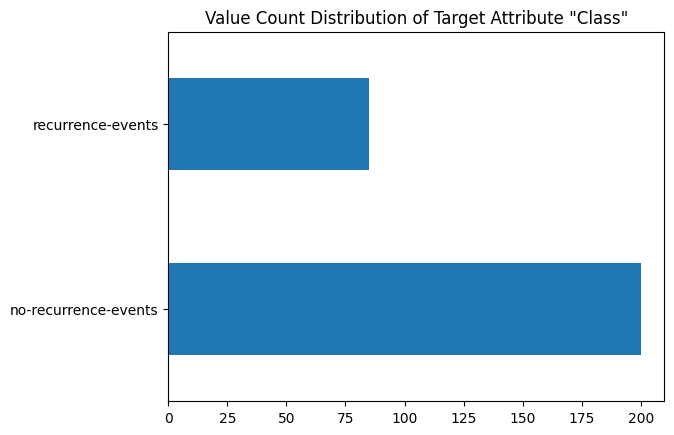

In [413]:
class_ = data['class'].value_counts()
class_.plot.barh()
plt.title('Value Count Distribution of Target Attribute "Class"')
plt.show()

About 70% of the dataset includes patients that didn't experience a recurrence of the disease. This means, and it is clearly shown, that the target attribute is heavily **unbalanced**. Machine learning models assume the data is balanced and perform poorly on imbalanced data, often predicting the majority value more frequently than the minority value. Some sampling might be necessary later on in the data processing step.

### Split the data into Train and Test set

For now I willl split my dataset into train and test sets and put the test set on the side. The test set will be the unseen data for evaluation after the model has been trained.

In [414]:
X = data.drop(['class'], axis = 1)
y = data['class']

In [415]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [416]:
X_train.shape

(228, 9)

In [417]:
y_train.shape

(228,)

In [418]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228 entries, 214 to 250
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          228 non-null    object
 1   menopause    228 non-null    object
 2   tumour_size  228 non-null    object
 3   inv_nodes    228 non-null    object
 4   node_caps    221 non-null    object
 5   deg_malig    228 non-null    int64 
 6   breast       228 non-null    object
 7   breast_quad  227 non-null    object
 8   irrad        228 non-null    object
dtypes: int64(1), object(8)
memory usage: 17.8+ KB


The attributes available are mainly ```object``` data type.

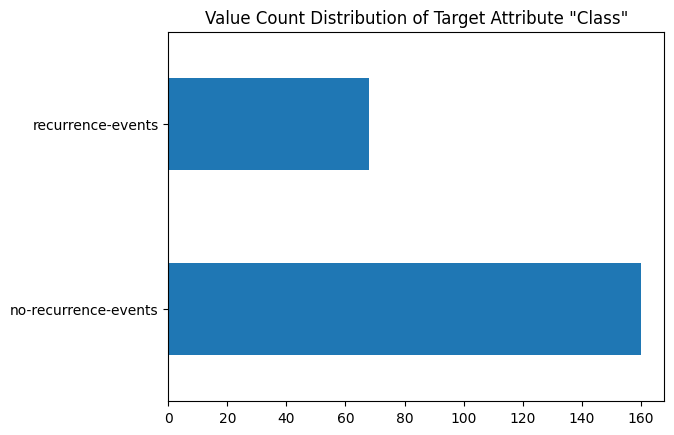

In [419]:
class_ = y_train.value_counts()
class_.plot.barh()
plt.title('Value Count Distribution of Target Attribute "Class"')
plt.show()

The imbalance of the target attribute has been conserved.

## **FROM HERE ONLY TESTS FOR NOW**

### Exploratory Data Analysis

#### Compute Correlation between the features

In [420]:
def cramers_v(data, x, y):
    cr_v = []
    confusion_matrix = pd.crosstab(data[x], data[y])
    chi2, p, dof, expected = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    res = np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
    return res

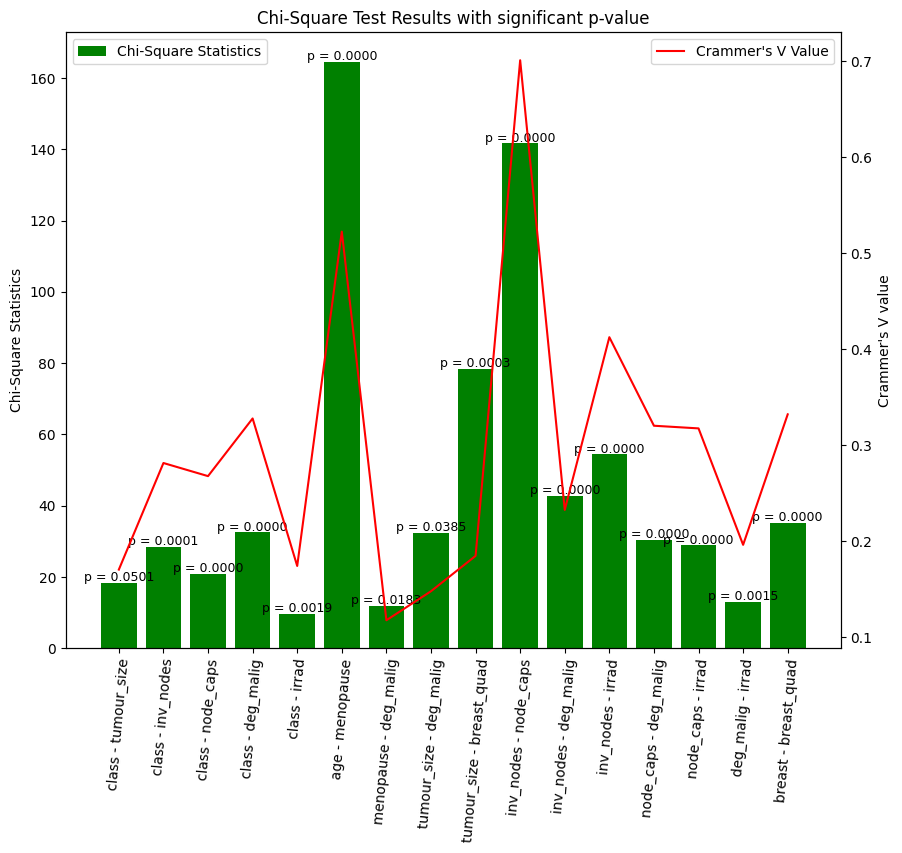

In [421]:
# perform correlation between attributes with non-continuous data
from scipy.stats import chi2_contingency

columns = data.columns
chi_p = []
cra_v = []
for i, column1 in enumerate(columns):
    for column2 in columns[i + 1:]:
        table = pd.crosstab(data[column1], data[column2])
        chi2, p, dof, expected = chi2_contingency(table)
        res = cramers_v(data, column1, column2)
        if p<=0.08:
            chi_p.append([column1, column2, chi2, p])
            cra_v.append([column1, column2, res])


bar_width = 0.35
# plot the results for chi-squared statistic
x = [f"{result[0]} - {result[1]}" for result in chi_p]
y = [result[2] for result in chi_p]
p = [result[3] for result in chi_p]

# plot the results for chi-squared statistic
x2 = [f"{result[0]} - {result[1]}" for result in cra_v]
y2 = [result[2] for result in cra_v]

fig, ax1 = plt.subplots()
fig.set_size_inches(10,8)
ax1.bar(x, y, color='green')
ax1.set_ylabel('Chi-Square Statistics')

for i, v in enumerate(y):
    ax1.text(i, v + 0.5, f"p = {p[i]:.4f}", ha='center', fontsize=9)

ax2 = ax1.twinx()
ax2.plot(x2, y2, color='red')
ax2.set_ylabel("Crammer's V value")

ax1.legend(['Chi-Square Statistics'], loc='upper left')
ax2.legend(["Crammer's V Value"], loc='upper right')

plt.title("Chi-Square Test Results with significant p-value")
plt.xlabel("Pairs of Features")
x_labels = [f"{result[0]} - {result[1]}" for result in chi_p]
ax1.set_xticks(np.arange(len(x)))
ax1.set_xticklabels(labels=x_labels, rotation=85)
plt.show()

#### Compute Feature Importance

In [422]:
X_train.index

Int64Index([214,  41,  24, 161, 144, 139,  28,   0,  61, 217,
            ...
            110,  19, 124, 178,  55, 189, 209, 236, 208, 250],
           dtype='int64', length=228)

In [423]:


y_test = y_test.replace(['no-recurrence-events','recurrence-events'], [0,1])
y_train = y_train.replace(['no-recurrence-events', 'recurrence-events'], [0,1])


X_train.drop(['age','menopause', 'breast'], axis=1)
X_test.drop(['age','menopause', 'breast'], axis=1)



X_train = pd.get_dummies(X_train)


X_test = pd.get_dummies(X_test)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)



In [424]:
X_train

,deg_malig,age_20-29,age_30-39,age_40-49,age_50-59,age_60-69,age_70-79,menopause_ge40,menopause_lt40,menopause_premeno,...,node_caps_yes,breast_left,breast_right,breast_quad_central,breast_quad_left_low,breast_quad_left_up,breast_quad_right_low,breast_quad_right_up,irrad_no,irrad_yes
214,2,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
41,1,0,0,0,0,1,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
24,2,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
161,2,0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1
144,2,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,3,0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,1
209,2,0,0,1,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,1,0
236,2,0,0,1,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
208,1,0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,1,0


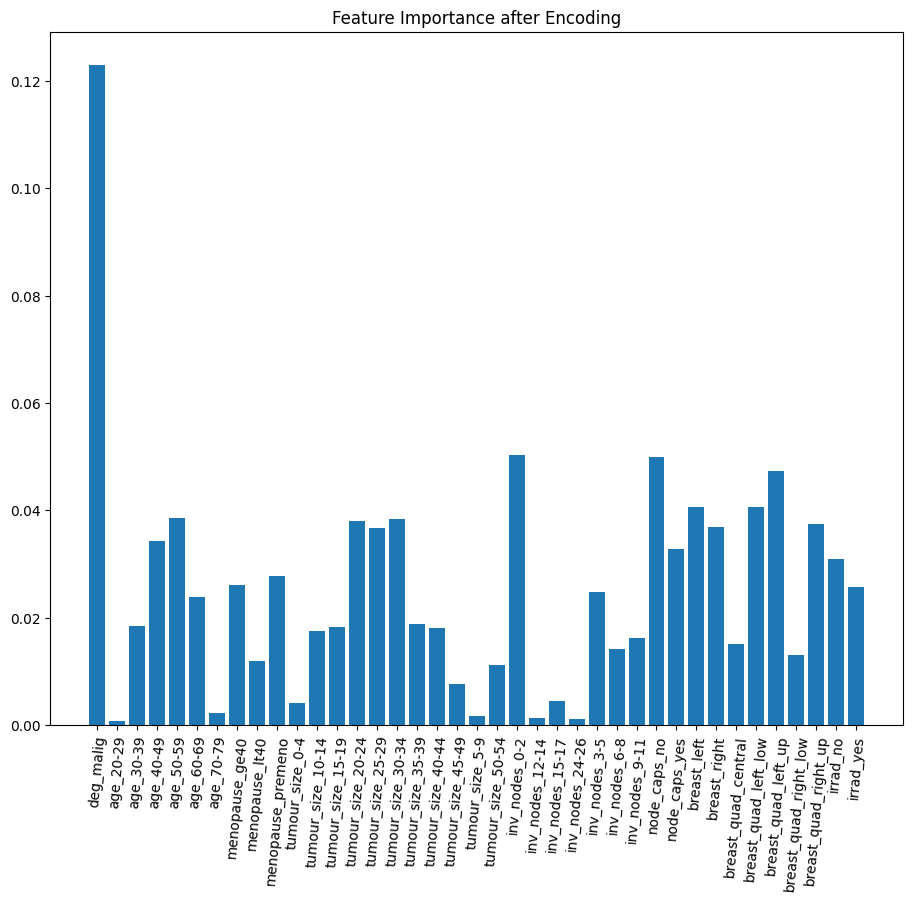

In [425]:
from sklearn.ensemble import RandomForestClassifier


clf = RandomForestClassifier()
clf.fit(X_train,y_train)

plt.figure(figsize=(11,9))
plt.bar(X_train.columns, clf.feature_importances_)
plt.xticks(rotation=85)
plt.title('Feature Importance after Encoding')
plt.show()

In [426]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
selector = SelectKBest(chi2, k=10)
X_train = selector.fit_transform(X_train, y_train)
X_test = selector.transform(X_test)


In [427]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_train, y_train = ros.fit_resample(X_train, y_train)

In [428]:
X_train

array([[2, 0, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [2, 0, 1, ..., 0, 0, 0],
       ...,
       [2, 0, 1, ..., 0, 1, 0],
       [3, 0, 0, ..., 1, 0, 0],
       [3, 0, 0, ..., 1, 1, 0]], dtype=int64)

In [429]:

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score, precision_score

from imblearn.over_sampling import RandomOverSampler

from IPython.display import display



clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
r_acc = clf.score(X_train, y_train)
r_f1 = f1_score(y_test, y_pred)
print(r_acc)
print(r_f1)

0.8
0.5128205128205129


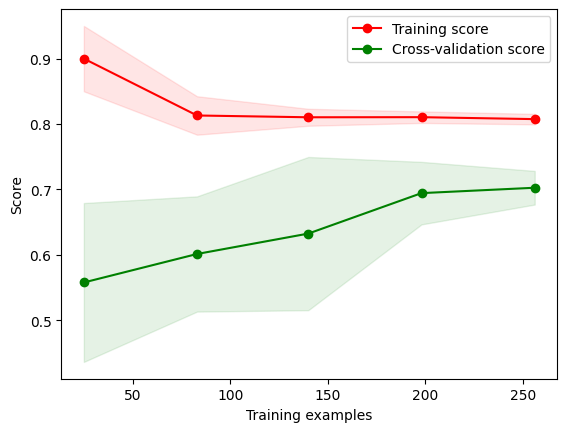

In [430]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(clf, X_train, y_train, cv=5, scoring='f1_macro')

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, valid_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

In [431]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_score)
average_precision = average_precision_score(y_test, y_score)

# plot the precision-recall curve
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.show()

NameError: name 'y_score' is not defined